In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("english_difficultyy/data_numerical.csv")
df.head()

,Unnamed: 0,word,fre,len,ps,difficult_ug,difficult_pg,POS_n,words_n
0,0,a,784,1,"('a', 'DT')",0,0,2,2
1,1,i,51,1,"('i', 'NN')",0,0,2311,2311
2,2,am,2,2,"('am', 'VBP')",0,-,188,188
3,3,go,9,2,"('go', 'VB')",0,0,2052,2052
4,4,me,12,2,"('me', 'PRP')",0,0,2928,2928


In [7]:
same = (df['words_n'] == df['POS_n']).sum()
total = len(df)
print(f"Same values: {same} out of {total}")

Same values: 5368 out of 5368


In [9]:
df = df.drop(columns = ['Unnamed: 0'])
df['pos_n_fixed'] = df['ps'].astype('category').cat.codes
print(df[['POS_n', 'pos_n_fixed']].drop_duplicates().head())


   POS_n  pos_n_fixed
0      2            2
1   2311         2311
2    188          188
3   2052         2052
4   2928         2928


In [11]:
df = df.drop(columns=['POS_n'])
df = df.rename(columns={'pos_n_fixed': 'POS_n'})
df.head()

,word,fre,len,ps,difficult_ug,difficult_pg,words_n,POS_n
0,a,784,1,"('a', 'DT')",0,0,2,2
1,i,51,1,"('i', 'NN')",0,0,2311,2311
2,am,2,2,"('am', 'VBP')",0,-,188,188
3,go,9,2,"('go', 'VB')",0,0,2052,2052
4,me,12,2,"('me', 'PRP')",0,0,2928,2928


In [13]:
df.drop(columns = ['words_n'])

,word,fre,len,ps,difficult_ug,difficult_pg,POS_n
0,a,784,1,"('a', 'DT')",0,0,2
1,i,51,1,"('i', 'NN')",0,0,2311
2,am,2,2,"('am', 'VBP')",0,-,188
3,go,9,2,"('go', 'VB')",0,0,2052
4,me,12,2,"('me', 'PRP')",0,0,2928
...,...,...,...,...,...,...,...
5363,representative,1,14,"('representative', 'JJ')",-,3,3992
5364,noninterference,2,15,"('noninterference', 'NN')",-,5,3196
5365,perpendicularity,1,16,"('perpendicularity', 'NN')",-,6,3464
5366,contradistinction,1,17,"('contradistinction', 'NN')",-,5,1010


In [15]:
import pandas as pd

df['pos_tag'] = df['ps'].str.split(',').str[-1]


unique_pos = df['pos_tag'].nunique()
pos_counts = df['pos_tag'].value_counts()

print(f"Total unique POS tags: {unique_pos}")
print("POS tag counts:")
print(pos_counts)

Total unique POS tags: 31
POS tag counts:
 'NN')      1608
 'JJ')      1121
 'NNS')      839
 'VBD')      320
 'VBG')      319
 'RB')       307
 'VBP')      285
 'VBN')      191
 'VBZ')      116
 'IN')        71
 'VB')        51
 'RBR')       19
 'JJS')       19
 'PRP')       17
 'DT')        16
 'JJR')       11
 'CD')        10
 'MD')         9
 'PRP$')       7
 'CC')         6
 'RP')         6
 'WRB')        4
 'WP')         4
 'NNP')        3
 'FW')         3
 'TO')         1
 'RBS')        1
 'EX')         1
 'WDT')        1
 'WP$')        1
 'NNPS')       1
Name: pos_tag, dtype: int64


In [17]:
df.drop(columns = ['words_n'],inplace = True)

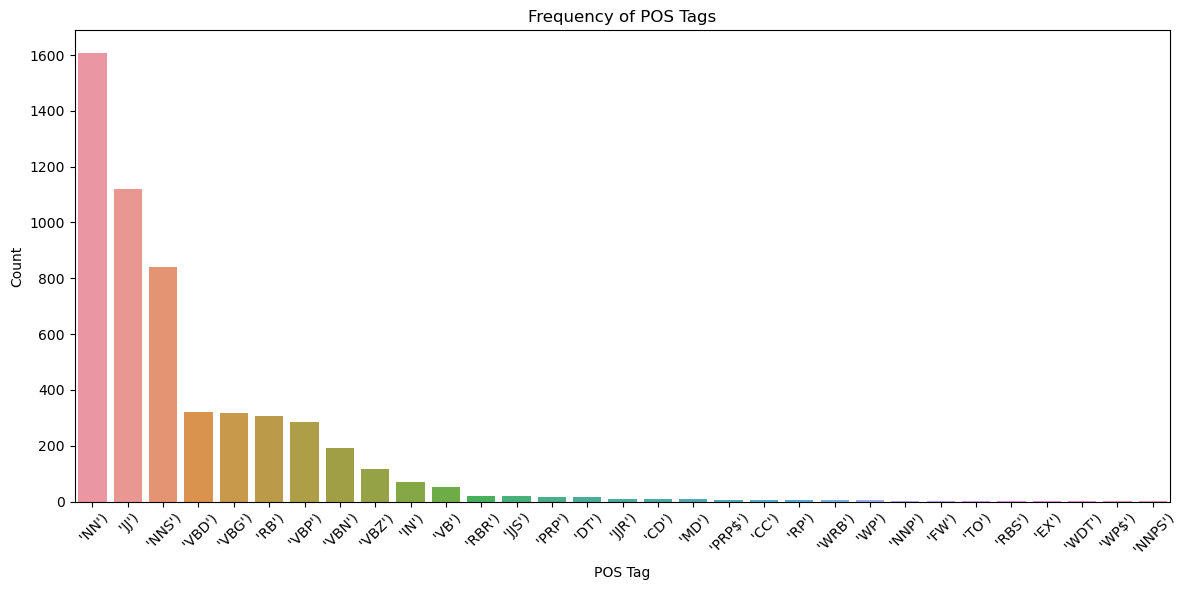

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x=df['pos_tag'].value_counts().index, y=df['pos_tag'].value_counts().values)
plt.xticks(rotation=45)
plt.title("Frequency of POS Tags")
plt.xlabel("POS Tag")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [21]:
df['difficult_ug'] = df['difficult_ug'].str.strip()
df['difficult_pg'] = df['difficult_pg'].str.strip()
ug_df = df[df['difficult_ug'] != '-'].copy()

ug_df['difficult_ug'] = pd.to_numeric(ug_df['difficult_ug'], errors='coerce')

ug_df = ug_df.dropna(subset=['difficult_ug'])
ug_df['difficult_ug'] = ug_df['difficult_ug'].astype(int)

pg_df = df[df['difficult_pg'] != '-'].copy()

pg_df['difficult_pg'] = pd.to_numeric(pg_df['difficult_pg'], errors='coerce')

pg_df = pg_df.dropna(subset=['difficult_pg'])
pg_df['difficult_pg'] = pg_df['difficult_pg'].astype(int)

In [23]:
import pandas as pd

ug_rows = ug_df.shape[0]
pg_rows = pg_df.shape[0]

print(f"Number of rows in ug_df: {ug_rows}")
print(f"Number of rows in pg_df: {pg_rows}")

ug_nan_count = ug_df.isnull().sum().sum()
print(f"Total NaN values in ug_df: {ug_nan_count}")


pg_nan_count = pg_df.isnull().sum().sum()
print(f"Total NaN values in pg_df: {pg_nan_count}")

Number of rows in ug_df: 3921
Number of rows in pg_df: 2614
Total NaN values in ug_df: 0
Total NaN values in pg_df: 0


In [25]:
ug_df.head()

,word,fre,len,ps,difficult_ug,difficult_pg,POS_n,pos_tag
0,a,784,1,"('a', 'DT')",0,0,2,'DT')
1,i,51,1,"('i', 'NN')",0,0,2311,'NN')
2,am,2,2,"('am', 'VBP')",0,-,188,'VBP')
3,go,9,2,"('go', 'VB')",0,0,2052,'VB')
4,me,12,2,"('me', 'PRP')",0,0,2928,'PRP')


In [29]:
ug_df.drop(columns = ['difficult_pg'],axis=1, inplace=True)

In [31]:
ug_df.groupby('pos_tag')[['difficult_ug']].mean().sort_values('difficult_ug', ascending=False)

,difficult_ug
pos_tag,
'JJ'),1.965000
'VBP'),1.779412
'VBD'),1.759657
'VBN'),1.681159
'VBG'),1.674797
'NN'),1.596899
'RB'),1.533333
'NNS'),1.404362
'FW'),1.333333


In [33]:
rare_pos = ug_df['pos_tag'].value_counts().loc[lambda x: x < 10]
print("Rare POS tags (less than 10 occurrences):")
print(rare_pos)


Rare POS tags (less than 10 occurrences):
 'CD')      9
 'JJR')     9
 'MD')      9
 'PRP$')    7
 'RP')      5
 'CC')      5
 'WRB')     4
 'WP')      4
 'FW')      3
 'WP$')     1
 'WDT')     1
 'TO')      1
 'EX')      1
 'NNP')     1
 'RBS')     1
 'NNPS')    1
Name: pos_tag, dtype: int64


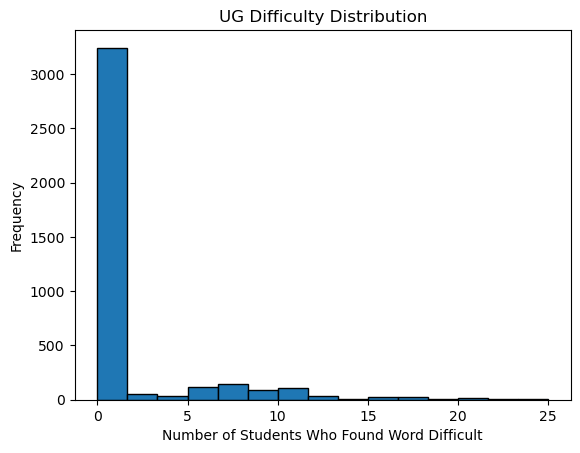

In [35]:
import matplotlib.pyplot as plt

ug_df['difficult_ug'].plot(kind='hist', bins=15, title='UG Difficulty Distribution', edgecolor='black')
plt.xlabel('Number of Students Who Found Word Difficult')
plt.show()

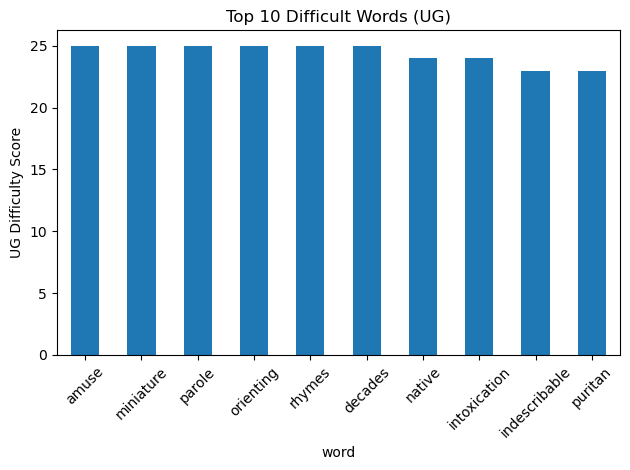

In [37]:
top_ug = ug_df.sort_values('difficult_ug', ascending=False).head(10)

# Plot top 10 difficult words (UG)
top_ug.plot.bar(x='word', y='difficult_ug', title='Top 10 Difficult Words (UG)', legend=False)
plt.ylabel('UG Difficulty Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

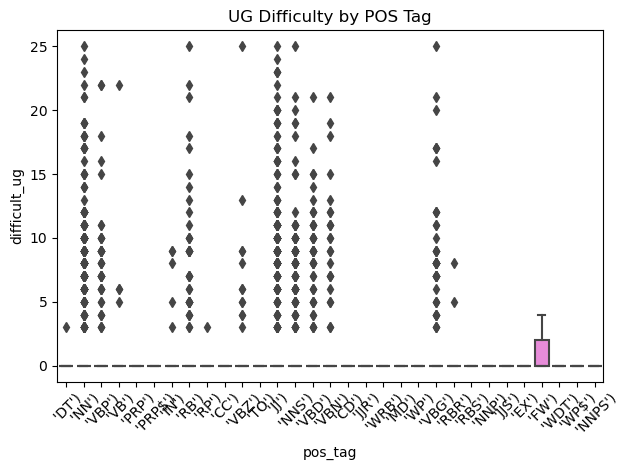

In [39]:
import seaborn as sns

sns.boxplot(x='pos_tag', y='difficult_ug', data=ug_df)
plt.title('UG Difficulty by POS Tag')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
!pip install wordcloud

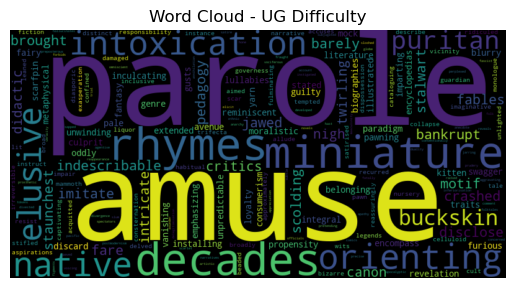

In [43]:
from wordcloud import WordCloud

freq_dict = dict(zip(ug_df['word'], ug_df['difficult_ug']))
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(freq_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - UG Difficulty")
plt.show()

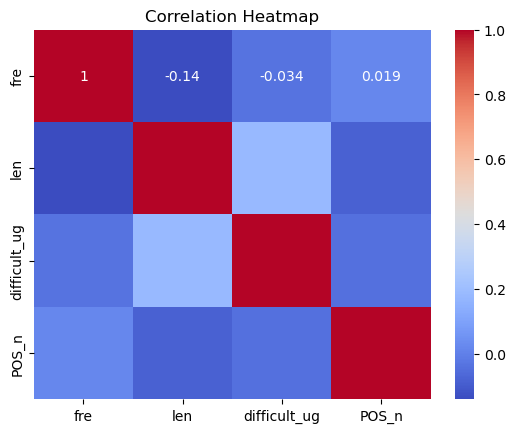

In [45]:
sns.heatmap(ug_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

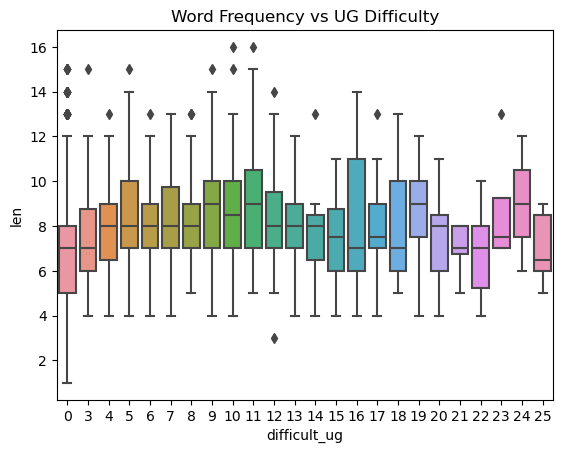

In [47]:
sns.boxplot(x='difficult_ug', y='len', data= ug_df)
plt.title('Word Frequency vs UG Difficulty')
plt.show()

In [49]:
def categorize_difficulty(x):
    if x <= 4:
        return 'easy'
    elif x <= 10:
        return 'medium'
    else:
        return 'hard'

ug_df['difficulty_level'] = ug_df['difficult_ug'].apply(categorize_difficulty)


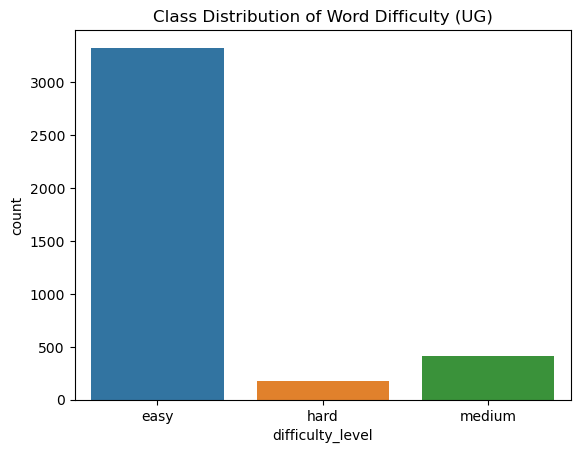

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=ug_df, x='difficulty_level')
plt.title("Class Distribution of Word Difficulty (UG)")
plt.show()


In [53]:
import re

# Strip white spaces and remove anything that's not a valid POS tag
ug_df['pos_tag'] = ug_df['pos_tag'].astype(str).apply(lambda x: re.sub(r"[^A-Z$]", "", x.strip()))

In [55]:
ug_df.head()

,word,fre,len,ps,difficult_ug,POS_n,pos_tag,difficulty_level
0,a,784,1,"('a', 'DT')",0,2,DT,easy
1,i,51,1,"('i', 'NN')",0,2311,NN,easy
2,am,2,2,"('am', 'VBP')",0,188,VBP,easy
3,go,9,2,"('go', 'VB')",0,2052,VB,easy
4,me,12,2,"('me', 'PRP')",0,2928,PRP,easy


In [57]:
ug_df['pos_tag'] = ug_df['pos_tag'].str.strip()

In [59]:
ug_df.drop(columns=['ps'], inplace=True)

In [61]:
pos_map = {
    'VB': 'verb', 'VBD': 'verb', 'VBG': 'verb', 'VBN': 'verb', 'VBP': 'verb', 'VBZ': 'verb',
    'NN': 'noun', 'NNS': 'noun', 'NNP': 'noun', 'NNPS': 'noun',
    'JJ': 'adj', 'JJR': 'adj', 'JJS': 'adj',
    'RB': 'adv', 'RBR': 'adv', 'RBS': 'adv',
    'IN': 'prep', 'DT': 'det', 'PRP': 'pron', 'PRP$': 'pron', 'CC': 'conj', 'TO': 'to',
    'MD': 'modal', 'EX': 'exist', 'CD': 'num', 'FW': 'foreign',
    'WDT': 'wh', 'WP': 'wh', 'WP$': 'wh', 'WRB': 'wh',
    'RP': 'part', 'POS': 'possess'
}

ug_df['pos_tag_general'] = ug_df['pos_tag'].map(pos_map).fillna('other')

In [63]:
ug_df.head()

,word,fre,len,difficult_ug,POS_n,pos_tag,difficulty_level,pos_tag_general
0,a,784,1,0,2,DT,easy,det
1,i,51,1,0,2311,NN,easy,noun
2,am,2,2,0,188,VBP,easy,verb
3,go,9,2,0,2052,VB,easy,verb
4,me,12,2,0,2928,PRP,easy,pron


In [65]:
print(ug_df['pos_tag_general'].unique())

['det' 'noun' 'verb' 'pron' 'prep' 'adv' 'part' 'conj' 'to' 'adj' 'num'
 'wh' 'modal' 'exist' 'foreign']


In [67]:
import pandas as pd

threshold = 10

pos_counts = ug_df['pos_tag_general'].value_counts()

rare_tags = pos_counts[pos_counts < threshold].index

# Step 4: Replace rare tags with "RARE"
ug_df['pos_tag_general'] = ug_df['pos_tag_general'].apply(lambda tag: 'RARE' if tag in rare_tags else tag)

In [69]:
print(ug_df['pos_tag_general'].unique())

['det' 'noun' 'verb' 'pron' 'prep' 'adv' 'RARE' 'adj' 'wh']


In [71]:
ug_df = pd.get_dummies(ug_df, columns=['pos_tag_general'], drop_first=True,prefix = 'pos')

In [73]:
ug_df.head()

,word,fre,len,difficult_ug,POS_n,pos_tag,difficulty_level,pos_adj,pos_adv,pos_det,pos_noun,pos_prep,pos_pron,pos_verb,pos_wh
0,a,784,1,0,2,DT,easy,0,0,1,0,0,0,0,0
1,i,51,1,0,2311,NN,easy,0,0,0,1,0,0,0,0
2,am,2,2,0,188,VBP,easy,0,0,0,0,0,0,1,0
3,go,9,2,0,2052,VB,easy,0,0,0,0,0,0,1,0
4,me,12,2,0,2928,PRP,easy,0,0,0,0,0,1,0,0


In [75]:
# Find all boolean columns (most likely your one-hot columns)
bool_cols = ug_df.select_dtypes(include='bool').columns

# Convert them to int
ug_df[bool_cols] = ug_df[bool_cols].astype(int)

In [77]:
mapping = {'easy': 0, 'medium': 1, 'hard': 2}
ug_df['difficulty_levels'] = ug_df['difficulty_level'].map(mapping)

In [79]:
ug_df.drop(columns = ['difficulty_level'],inplace = True)

In [81]:
ug_df.head()

,word,fre,len,difficult_ug,POS_n,pos_tag,pos_adj,pos_adv,pos_det,pos_noun,pos_prep,pos_pron,pos_verb,pos_wh,difficulty_levels
0,a,784,1,0,2,DT,0,0,1,0,0,0,0,0,0
1,i,51,1,0,2311,NN,0,0,0,1,0,0,0,0,0
2,am,2,2,0,188,VBP,0,0,0,0,0,0,1,0,0
3,go,9,2,0,2052,VB,0,0,0,0,0,0,1,0,0
4,me,12,2,0,2928,PRP,0,0,0,0,0,1,0,0,0


In [83]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [85]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ABHISATWIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ABHISATWIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [87]:
words = ug_df['word'].astype(str).values

In [89]:
from gensim.models import Word2Vec
sentences = [[word] for word in words]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [111]:
X = np.array([w2v_model.wv[word] for word in words if word is not None and word in w2v_model.wv])

In [113]:
y = ug_df['difficulty_levels']

In [115]:
from imblearn.over_sampling import SMOTE

In [117]:
print(type(X), type(y))
print(X is None, y is None)


<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
False False


In [121]:
filtered = [(w, label) for w, label in zip(words, y) if w is not None and w in w2v_model.wv]
X = np.array([w2v_model.wv[w] for w, _ in filtered])
y = np.array([label for _, label in filtered])


In [153]:
import numpy as np
X_np = np.array(X)
y_np = np.array(y)

In [157]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=42)


In [161]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Reshape input to [samples, timesteps=1, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

model = Sequential([
    Input(shape=(1, 100)),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: easy, medium, hard
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,419 (173.51 KB)

 Trainable params: 44,419 (173.51 KB)

 Non-trainable params: 0 (0.00 B)

In [171]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience= 5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs= 35,
                    batch_size=32,
                    callbacks=[early_stop])

Epoch 1/35
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8991 - loss: 0.2823 - val_accuracy: 0.8232 - val_loss: 0.4890
Epoch 2/35
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8986 - loss: 0.2769 - val_accuracy: 0.8282 - val_loss: 0.4765
Epoch 3/35
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9068 - loss: 0.2785 - val_accuracy: 0.8312 - val_loss: 0.4894
Epoch 4/35
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9068 - loss: 0.2719 - val_accuracy: 0.8302 - val_loss: 0.4837
Epoch 5/35
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9024 - loss: 0.2767 - val_accuracy: 0.8363 - val_loss: 0.4784
Epoch 6/35
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9091 - loss: 0.2625 - val_accuracy: 0.8388 - val_loss: 0.4809
Epoch 7/35
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9073 - loss: 0.2712 - val_accuracy: 0.8408 - val_loss: 0.4671
Epoch 8/35
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9082 - loss: 0.2634 - val_accuracy: 0.

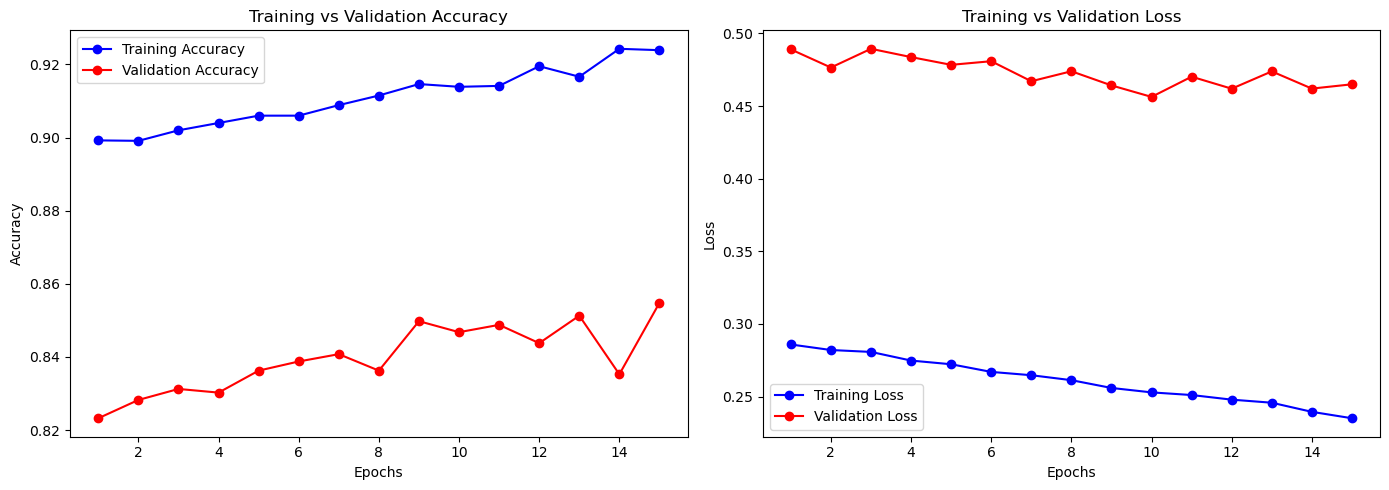

In [173]:
import matplotlib.pyplot as plt

# Assuming you have this after training:
# history = model.fit(...)

# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [175]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:\n", classification_report(y_test, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.68      0.75       665
           1       0.79      0.86      0.83       666
           2       0.91      1.00      0.95       666

    accuracy                           0.85      1997
   macro avg       0.85      0.85      0.84      1997
weighted avg       0.85      0.85      0.84      1997

Confusion Matrix:
 [[450 149  66]
 [ 91 575   0]
 [  0   0 666]]


In [177]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("Precision (macro):", precision_score(y_test, y_pred_classes, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_classes, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_classes, average='macro'))


Accuracy: 0.8467701552328493
Precision (macro): 0.8452759788572733
Recall (macro): 0.8466850308955571
F1 Score (macro): 0.8421321619278787


In [183]:
# Create a list of mini "sentences" where each word is a list by itself
sentences = [[word] for word in ug_df['word'].dropna().astype(str)]

In [185]:
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


In [187]:
import numpy as np

def get_vector(word):
    try:
        return model.wv[word]
    except KeyError:
        return np.zeros(100)

# Add a new column of embeddings
ug_df['embedding'] = ug_df['word'].astype(str).apply(get_vector)


In [189]:
ug_df.head()

,word,fre,len,difficult_ug,POS_n,pos_tag,pos_adj,pos_adv,pos_det,pos_noun,pos_prep,pos_pron,pos_verb,pos_wh,difficulty_levels,embedding
0,a,784,1,0,2,DT,0,0,1,0,0,0,0,0,0,"[-0.009017419, -0.0057874466, 0.0036440992, 0...."
1,i,51,1,0,2311,NN,0,0,0,1,0,0,0,0,0,"[-0.0075759245, 0.0047822823, -0.009823412, -0..."
2,am,2,2,0,188,VBP,0,0,0,0,0,0,1,0,0,"[-0.007138722, 0.002327869, 0.0040538083, -0.0..."
3,go,9,2,0,2052,VB,0,0,0,0,0,0,1,0,0,"[-0.008386005, -0.0039873207, -0.008169743, -0..."
4,me,12,2,0,2928,PRP,0,0,0,0,0,1,0,0,0,"[-0.0077022314, 0.00450792, 0.0044817673, -0.0..."


In [193]:
X_embed = np.stack(ug_df['embedding'].values)
y = ug_df['difficulty_levels'].values  # assuming you've already created 'easy', 'medium', 'hard' categories

In [197]:
ros = RandomOverSampler(random_state=42)
X_resampled_2, y_resampled_2 = ros.fit_resample(X_embed, y)


In [209]:
from sklearn.ensemble import GradientBoostingClassifier

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_2, y_resampled_2, test_size=0.2, random_state=42)

# 3. Train Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# 4. Make predictions
y_pred = gb_clf.predict(X_test)

In [213]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.75      0.83       675
           1       0.82      0.94      0.88       664
           2       0.93      0.99      0.96       658

    accuracy                           0.89      1997
   macro avg       0.90      0.89      0.89      1997
weighted avg       0.90      0.89      0.89      1997

Confusion Matrix:
 [[504 128  43]
 [ 31 626   7]
 [  0   6 652]]


In [215]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.8923385077616425
Precision (macro): 0.8981717380225333
Recall (macro): 0.8934397366568604
F1 Score (macro): 0.8903649545991672


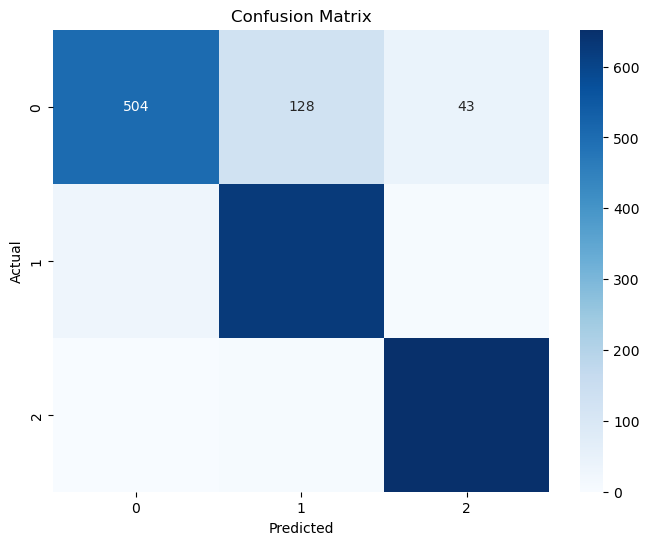

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Your confusion matrix data
cm = np.array([
    [504, 128, 43],
    [31, 626, 7],
    [0, 6, 652]
])

labels = [0, 1, 2]
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [231]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train XGBoost
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)



In [233]:
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       675
           1       1.00      1.00      1.00       664
           2       1.00      1.00      1.00       658

    accuracy                           1.00      1997
   macro avg       1.00      1.00      1.00      1997
weighted avg       1.00      1.00      1.00      1997

Confusion Matrix:
 [[672   3   0]
 [  0 664   0]
 [  0   0 658]]


In [235]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision (macro):", precision_score(y_test, y_pred_xgb, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_xgb, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_xgb, average='macro'))

Accuracy: 0.9984977466199298
Precision (macro): 0.9985007496251873
Recall (macro): 0.9985185185185186
F1 Score (macro): 0.9985062947016968


In [247]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

lgbm = LGBMClassifier(random_state=42)

lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lgbm))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_lgbm))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010778 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25497
[LightGBM] [Info] Number of data points in the train set: 7987, number of used features: 100
[LightGBM] [Info] Start training from score -1.102124
[LightGBM] [Info] Start training from score -1.097986
[LightGBM] [Info] Start training from score -1.095737

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       675
           1       0.99      1.00      1.00       664
           2       1.00      1.00      1.00       658

    accuracy                           1.00      1997
   macro avg       1.00      1.00      1.00      1997
weighted avg       1.00      1.00      1.00      1997


Confusion Matrix:

[[669   5   1]
 [  1 663   0]
 [  0   0 658]]


In [245]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Precision (macro):", precision_score(y_test, y_pred_lgbm, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_lgbm, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_lgbm, average='macro'))

Accuracy: 0.9964947421131698
Precision (macro): 0.9965016606878648
Recall (macro): 0.9965350290049085
F1 Score (macro): 0.9965105776954267


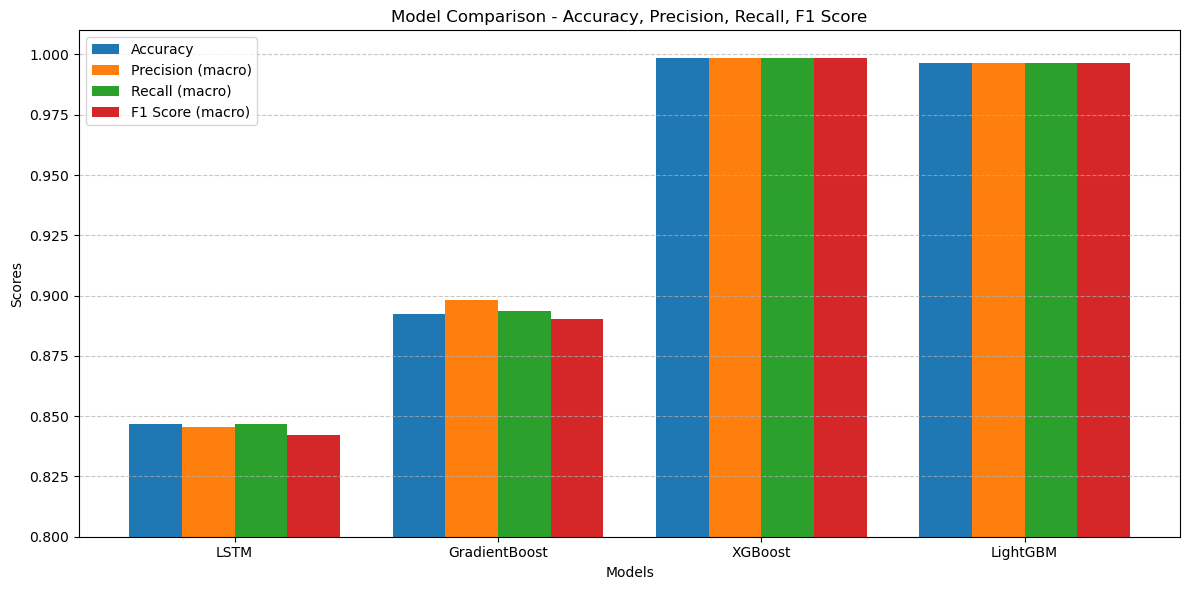

In [251]:
import matplotlib.pyplot as plt
import numpy as np

models = ['LSTM', 'GradientBoost', 'XGBoost', 'LightGBM']

# Metrics
accuracy = [0.8468, 0.8923, 0.9985, 0.9965]
precision = [0.8453, 0.8982, 0.9985, 0.9965]
recall = [0.8467, 0.8934, 0.9985, 0.9965]
f1_score = [0.8421, 0.8904, 0.9985, 0.9965]

# Bar settings
bar_width = 0.2
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(r1, accuracy, width=bar_width, label='Accuracy')
plt.bar(r2, precision, width=bar_width, label='Precision (macro)')
plt.bar(r3, recall, width=bar_width, label='Recall (macro)')
plt.bar(r4, f1_score, width=bar_width, label='F1 Score (macro)')

# Labels and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison - Accuracy, Precision, Recall, F1 Score')
plt.xticks([r + 1.5 * bar_width for r in range(len(models))], models)
plt.ylim(0.8, 1.01)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [253]:
pg_df.head()

,word,fre,len,ps,difficult_ug,difficult_pg,POS_n,pos_tag
0,a,784,1,"('a', 'DT')",0,0,2,'DT')
1,i,51,1,"('i', 'NN')",0,0,2311,'NN')
3,go,9,2,"('go', 'VB')",0,0,2052,'VB')
4,me,12,2,"('me', 'PRP')",0,0,2928,'PRP')
5,my,20,2,"('my', 'PRP$')",0,0,3111,'PRP$')


In [255]:
pg_df.drop(columns = ['difficult_ug'],axis=1, inplace=True)

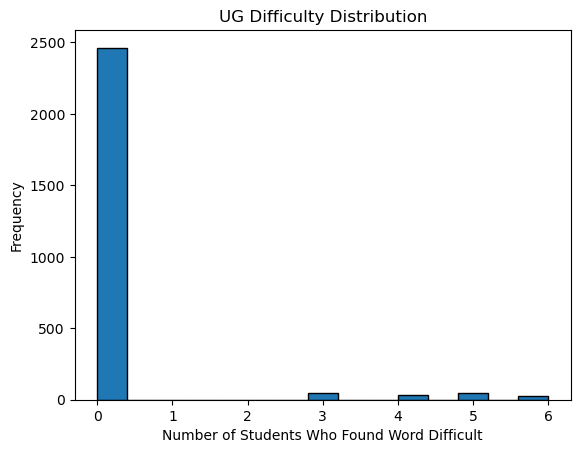

In [259]:
import matplotlib.pyplot as plt

pg_df['difficult_pg'].plot(kind='hist', bins=15, title='UG Difficulty Distribution', edgecolor='black')
plt.xlabel('Number of Students Who Found Word Difficult')
plt.show()


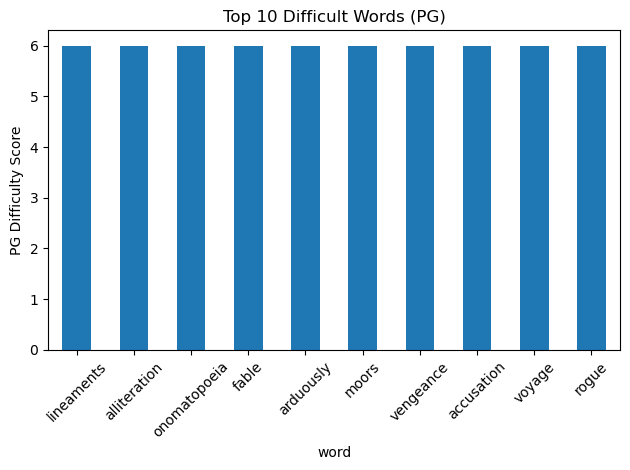

In [261]:
top_pg = pg_df.sort_values('difficult_pg', ascending=False).head(10)

# Plot top 10 difficult words (UG)
top_pg.plot.bar(x='word', y='difficult_pg', title='Top 10 Difficult Words (PG)', legend=False)
plt.ylabel('PG Difficulty Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


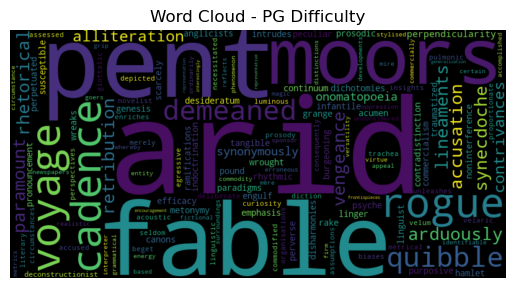

In [263]:
from wordcloud import WordCloud

freq_dict = dict(zip(pg_df['word'], pg_df['difficult_pg']))
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(freq_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - PG Difficulty")
plt.show()


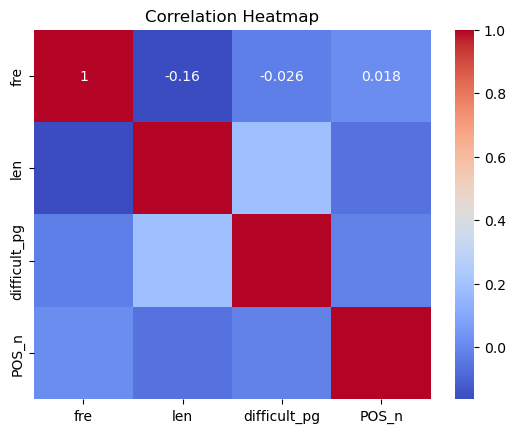

In [265]:
sns.heatmap(pg_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

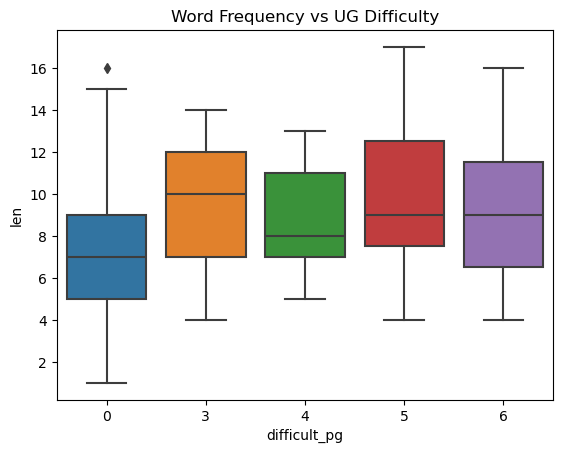

In [267]:
sns.boxplot(x='difficult_pg', y='len', data= pg_df)
plt.title('Word Frequency vs UG Difficulty')
plt.show()

In [277]:
def categorize_difficulty(x):
    if x <= 2:
        return 'easy'
    elif x <= 6:
        return 'hard'

pg_df['difficulty_level'] = pg_df['difficult_pg'].apply(categorize_difficulty)

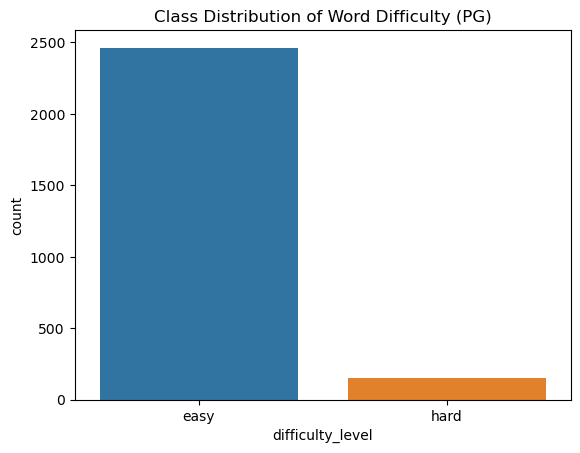

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=pg_df, x='difficulty_level')
plt.title("Class Distribution of Word Difficulty (PG)")
plt.show()


In [281]:
mapping = {'easy': 0,'hard': 1}
pg_df['difficulty_levels'] = pg_df['difficulty_level'].map(mapping)

In [283]:
pg_df.drop(columns = ['difficulty_level'],inplace = True)

In [285]:
pg_df.head()

,word,fre,len,ps,difficult_pg,POS_n,pos_tag,difficulty_levels
0,a,784,1,"('a', 'DT')",0,2,'DT'),0
1,i,51,1,"('i', 'NN')",0,2311,'NN'),0
3,go,9,2,"('go', 'VB')",0,2052,'VB'),0
4,me,12,2,"('me', 'PRP')",0,2928,'PRP'),0
5,my,20,2,"('my', 'PRP$')",0,3111,'PRP$'),0


In [287]:
words = pg_df['word'].astype(str).values

In [289]:
from gensim.models import Word2Vec
sentences = [[word] for word in words]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [293]:
import numpy as np

X_pg = np.array([w2v_model.wv[word] for word in words])

In [321]:
y_pg = pg_df['difficulty_levels']

In [323]:
print(y_pg)

0       0
1       0
3       0
4       0
5       0
       ..
5363    1
5364    1
5365    1
5366    1
5367    1
Name: difficulty_levels, Length: 2614, dtype: int64


In [299]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_pg, y_pg)


In [327]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=42)


In [329]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Reshape input to [samples, timesteps=1, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

model = Sequential([
    Input(shape=(1, 100)),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,353 (173.25 KB)

 Trainable params: 44,353 (173.25 KB)

 Non-trainable params: 0 (0.00 B)

In [335]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience= 5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs= 40,
                    batch_size=32,
                    callbacks=[early_stop])


Epoch 1/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9238 - loss: 0.2364 - val_accuracy: 0.9077 - val_loss: 0.2896
Epoch 2/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9203 - loss: 0.2389 - val_accuracy: 0.9097 - val_loss: 0.2882
Epoch 3/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9250 - loss: 0.2344 - val_accuracy: 0.9077 - val_loss: 0.2875
Epoch 4/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9219 - loss: 0.2429 - val_accuracy: 0.9118 - val_loss: 0.2819
Epoch 5/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9323 - loss: 0.2172 - val_accuracy: 0.9087 - val_loss: 0.2839
Epoch 6/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9251 - loss: 0.2318 - val_accuracy: 0.9138 - val_loss: 0.2804
Epoch 7/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9199 - loss: 0.2390 - val_accuracy: 0.9108 - val_loss: 0.2749
Epoch 8/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9287 - loss: 0.2223 - val_accuracy: 0.

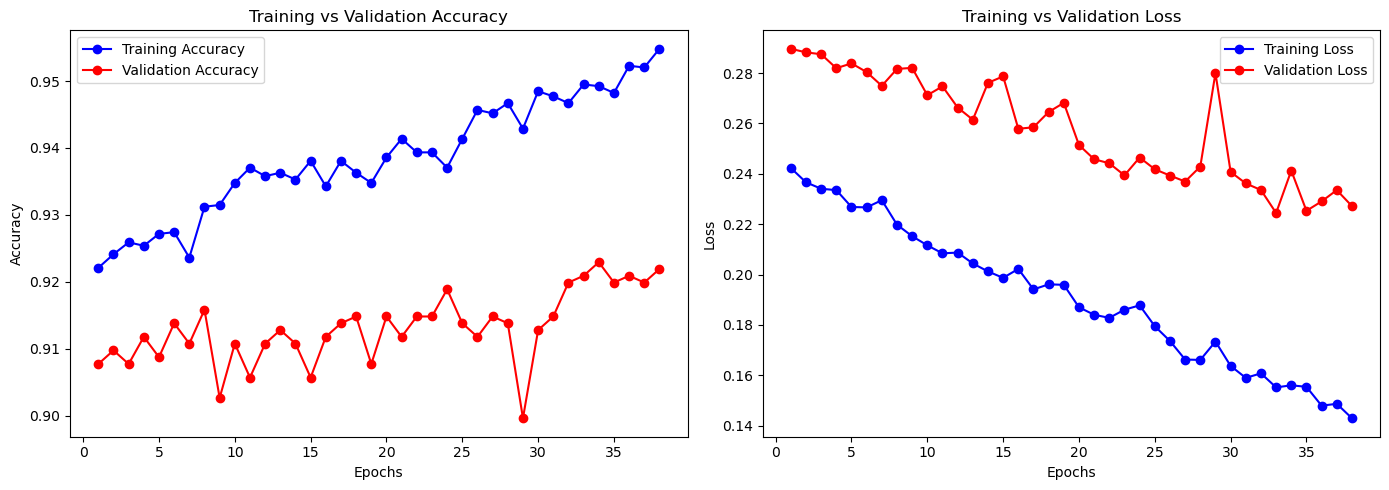

In [337]:
import matplotlib.pyplot as plt

# Assuming you have this after training:
# history = model.fit(...)

# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [343]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred_probs = model.predict(X_test)

y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91       493
           1       0.86      1.00      0.93       493

    accuracy                           0.92       986
   macro avg       0.93      0.92      0.92       986
weighted avg       0.93      0.92      0.92       986

Confusion Matrix:
 [[415  78]
 [  0 493]]


In [345]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


Accuracy: 0.920892494929006
Precision: 0.8633975481611208
Recall : 1.0
F1 Score : 0.9266917293233082


In [347]:
sentences = [[word] for word in pg_df['word'].dropna().astype(str)]

In [349]:
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
import numpy as np

def get_vector(word):
    try:
        return model.wv[word]
    except KeyError:
        return np.zeros(100)

# Add a new column of embeddings
pg_df['embedding'] = pg_df['word'].astype(str).apply(get_vector)
X_embed = np.stack(pg_df['embedding'].values)
y = pg_df['difficulty_levels'].values

In [351]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_embed, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [383]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Use this model for evaluation
model = dt_model


In [387]:
y_pred = model.predict(X_test)

# If probabilities returned (not usually for DecisionTree), convert to binary
if y_pred.ndim > 1 or y_pred.dtype != int:
    y_pred = (y_pred > 0.5).astype("int32").flatten()

# Metrics
print(" Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       512
           1       0.95      1.00      0.97       474

    accuracy                           0.97       986
   macro avg       0.97      0.97      0.97       986
weighted avg       0.97      0.97      0.97       986

Confusion Matrix:
 [[485  27]
 [  0 474]]


In [389]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

 Accuracy: 0.9726166328600405
Precision: 0.9461077844311377
Recall: 1.0
F1 Score: 0.9723076923076923


In [391]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=5,             # Limit tree depth
    min_samples_split=10,    # Minimum samples to split a node
    min_samples_leaf=4,      # Minimum samples at a leaf node
    max_features='sqrt',     # Random subset of features
    bootstrap=True,          # Bootstrap sampling
    random_state=42
)

rf_model.fit(X_train, y_train)
model = rf_model  # For evaluation


In [393]:
y_pred = model.predict(X_test)

# If probabilities returned (not usually for DecisionTree), convert to binary
if y_pred.ndim > 1 or y_pred.dtype != int:
    y_pred = (y_pred > 0.5).astype("int32").flatten()

# Metrics
print(" Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       512
           1       0.94      0.99      0.96       474

    accuracy                           0.96       986
   macro avg       0.96      0.96      0.96       986
weighted avg       0.96      0.96      0.96       986

Confusion Matrix:
 [[481  31]
 [  5 469]]


In [395]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

 Accuracy: 0.9634888438133874
Precision: 0.938
Recall: 0.989451476793249
F1 Score: 0.9630390143737166


In [411]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Normalize + Train SVM with tuned hyperparameters
svm_model = make_pipeline(
    StandardScaler(),  # Feature scaling is CRUCIAL for SVM
    SVC(
        kernel='linear',     # Try also 'linear' or 'poly'
        C= 0.75,            # Regularization (lower = more regularization)
        gamma='scale',    # Auto-tune RBF spread
        probability=True,
        random_state=42
    )
)

svm_model.fit(X_train, y_train)
model = svm_model


In [413]:
y_pred = model.predict(X_test)
if y_pred.ndim > 1 or y_pred.dtype != int:
    y_pred = (y_pred > 0.5).astype("int32").flatten()

print(" Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.60      0.67       512
           1       0.64      0.77      0.70       474

    accuracy                           0.68       986
   macro avg       0.69      0.69      0.68       986
weighted avg       0.69      0.68      0.68       986

Confusion Matrix:
 [[309 203]
 [108 366]]


In [415]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

 Accuracy: 0.6845841784989858
Precision: 0.6432337434094904
Recall: 0.7721518987341772
F1 Score: 0.7018216682646212


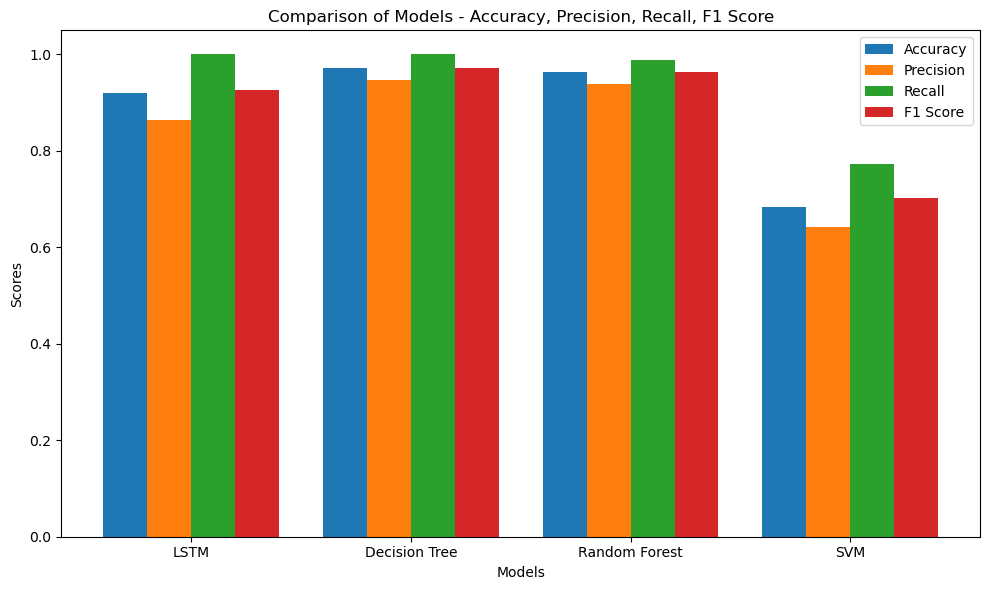

In [417]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
models = ['LSTM', 'Decision Tree', 'Random Forest', 'SVM']
accuracy = [0.920892494929006, 0.9726166328600405, 0.9634888438133874, 0.6845841784989858]
precision = [0.8633975481611208, 0.9461077844311377, 0.938, 0.6432337434094904]
recall = [1.0, 1.0, 0.989451476793249, 0.7721518987341772]
f1_score = [0.9266917293233082, 0.9723076923076923, 0.9630390143737166, 0.7018216682646212]

# Set bar width and positions
bar_width = 0.2
index = np.arange(len(models))

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
ax.bar(index, accuracy, bar_width, label='Accuracy')
ax.bar(index + bar_width, precision, bar_width, label='Precision')
ax.bar(index + 2*bar_width, recall, bar_width, label='Recall')
ax.bar(index + 3*bar_width, f1_score, bar_width, label='F1 Score')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models - Accuracy, Precision, Recall, F1 Score')
ax.set_xticks(index + 1.5*bar_width)
ax.set_xticklabels(models)

# Add legend
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()
